In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec            # to arrange the plots nicely
import pandas as pd
import math
from scipy.optimize import curve_fit
from scipy.stats import chisquare

%matplotlib inline
#plt.style.use('seaborn-talk')
#plt.style.use('seaborn-white')
#plt.style.use('tableau-colorblind10')
#plt.style.use('ggplot')
#plt.style.available

In [61]:
# bandwidth(t)

ib=pd.read_csv("../read/band_1B.txt",sep=';',names=['null','null','null','null','ib','null','null','null','null','null','null','null','null','null','null','null'])
vb=pd.read_csv("../read/band_8B.txt",sep=';',names=['null','null','null','null','vb','null','null','null','null','null','null','null','null','null','null','null'])
cb=pd.read_csv("../read/band_128B.txt",sep=';',names=['null','null','null','null','cb','null','null','null','null','null','null','null','null','null','null','null'])
db=pd.read_csv("../read/band_512B.txt",sep=';',names=['null','null','null','null','db','null','null','null','null','null','null','null','null','null','null','null'])
ikb=pd.read_csv("../read/band_1KB.txt",sep=';',names=['null','null','null','null','ikb','null','null','null','null','null','null','null','null','null','null','null'])
vkb=pd.read_csv("../read/band_8KB.txt",sep=';',names=['null','null','null','null','vkb','null','null','null','null','null','null','null','null','null','null','null'])
ckb=pd.read_csv("../read/band_128KB.txt",sep=';',names=['null','null','null','null','ckb','null','null','null','null','null','null','null','null','null','null','null'])
dkb=pd.read_csv("../read/band_512KB.txt",sep=';',names=['null','null','null','null','dkb','null','null','null','null','null','null','null','null','null','null','null'])
imb=pd.read_csv("../read/band_1MB.txt",sep=';',names=['null','null','null','null','imb','null','null','null','null','null','null','null','null','null','null','null'])
vmb=pd.read_csv("../read/band_8MB.txt",sep=';',names=['null','null','null','null','vmb','null','null','null','null','null','null','null','null','null','null','null'])
cmb=pd.read_csv("../read/band_128MB.txt",sep=';',names=['null','null','null','null','cmb','null','null','null','null','null','null','null','null','null','null','null'])
dmb=pd.read_csv("../read/band_512MB.txt",sep=';',names=['null','null','null','null','dmb','null','null','null','null','null','null','null','null','null','null','null'])
igb=pd.read_csv("../read/band_1GB.txt",sep=';',names=['null','null','null','null','igb','null','null','null','null','null','null','null','null','null','null','null'])

ib=ib['ib']
vb=vb['vb']
cb=cb['cb']
db=db['db']
ikb=ikb['ikb']
vkb=vkb['vkb']
ckb=ckb['ckb']
dkb=dkb['dkb']
imb=imb['imb']
vmb=vmb['vmb']
cmb=cmb['cmb']
dmb=dmb['dmb']
igb=igb['igb']

band=pd.concat([ib,vb,cb,db,ikb,vkb,ckb,dkb,imb,vmb,cmb,dmb,igb], axis=1, sort=False)

band['ib']=band['ib']*8/1000000000
band['vb']=band['vb']*8/1000000000
band['cb']=band['cb']*8/1000000000
band['db']=band['db']*8/1000000000
band['ikb']=band['ikb']*8/1000000000
band['vkb']=band['vkb']*8/1000000000
band['ckb']=band['ckb']*8/1000000000
band['dkb']=band['dkb']*8/1000000000
band['imb']=band['imb']*8/1000000000
band['vmb']=band['vmb']*8/1000000000
band['cmb']=band['cmb']*8/1000000000
band['dmb']=band['dmb']*8/1000000000
band['igb']=band['igb']*8/1000000000

band=band.rename(columns={'ib' : '1 B',
                         'vb' : '8 B',
                         'cb' : '128 B',
                         'db' : '512 B',
                         'ikb' : '1 KB',
                         'vkb' : '8 KB',
                         'ckb' : '128 KB',
                         'dkb' : '512 KB',
                         'imb' : '1 MB',
                         'vmb' : '8 MB',
                         'cmb' : '128 MB',
                         'dmb' : '512 MB',
                         'igb' : '1 GB'})

band=band.iloc[::2]
band.index = range(20)

means=pd.DataFrame({"Average Bandwidth":[band['1 B'].mean(),band['8 B'].mean(),band['128 B'].mean(),band['512 B'].mean(),
                                        band['1 KB'].mean(),band['8 KB'].mean(),band['128 KB'].mean(),band['512 KB'].mean(),
                                        band['1 MB'].mean(),band['8 MB'].mean(),band['128 MB'].mean(),band['512 MB'].mean(),
                                        band['1 GB'].mean()],
                   "Range":['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB','1 GB']})

#band.head(20)
means.head(13)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


Average Bandwidth   Range
0            0.255953     1 B
1            1.943118     8 B
2           21.267770   128 B
3           56.523266   512 B
4           76.426511    1 KB
5           83.760859    8 KB
6           90.224088  128 KB
7           90.313750  512 KB
8           90.145920    1 MB
9           89.235716    8 MB
10          88.599412  128 MB
11          87.382580  512 MB
12          90.541002    1 GB

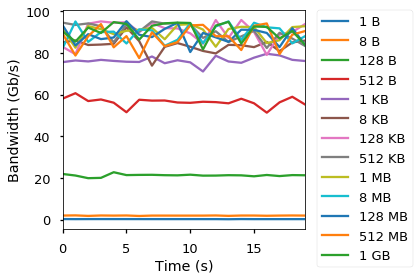

In [69]:
band.plot(y=['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB','1 GB'])
plt.ylabel("Bandwidth (Gb/s)")
plt.xlabel("Time (s)")
#plt.ylim(-50,200)
plt.xlim(0,19)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.suptitle('Bandwidth', fontsize=14, fontweight='bold')
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/band_sto_time.eps',format='eps',dpi=1000)
plt.show()

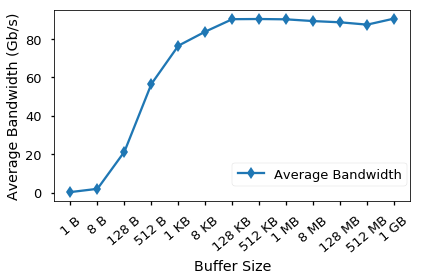

In [73]:
means.plot(y=['Average Bandwidth'],xticks=means.index,marker='d').set_xticklabels(means.Range)
#ax.set_xticklabels(means.action)
plt.ylabel("Average Bandwidth (Gb/s)")
plt.xlabel("Buffer Size")
#plt.ylim(0,100)
#plt.xlim(0,12)
plt.legend(bbox_to_anchor=(0.5, 0.2), loc=2, borderaxespad=0.)
#plt.suptitle('Average Bandwidth (Buffer Size)', fontsize=14, fontweight='bold')
plt.xticks(rotation=40)
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/band_sto_buf.eps',format='eps',dpi=1000)
plt.show()

In [84]:
# disk

ib=pd.read_csv("../read/disk_1B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','ib','null','null','null','null','null','null','null','null'])
vb=pd.read_csv("../read/disk_8B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','vb','null','null','null','null','null','null','null','null'])
cb=pd.read_csv("../read/disk_128B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','cb','null','null','null','null','null','null','null','null'])
db=pd.read_csv("../read/disk_512B.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','db','null','null','null','null','null','null','null','null'])
ikb=pd.read_csv("../read/disk_1KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','ikb','null','null','null','null','null','null','null','null'])
vkb=pd.read_csv("../read/disk_8KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','vkb','null','null','null','null','null','null','null','null'])
ckb=pd.read_csv("../read/disk_128KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','ckb','null','null','null','null','null','null','null','null'])
dkb=pd.read_csv("../read/disk_512KB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','dkb','null','null','null','null','null','null','null','null'])
imb=pd.read_csv("../read/disk_1MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','imb','null','null','null','null','null','null','null','null'])
vmb=pd.read_csv("../read/disk_8MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','vmb','null','null','null','null','null','null','null','null'])
cmb=pd.read_csv("../read/disk_128MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','cmb','null','null','null','null','null','null','null','null'])
dmb=pd.read_csv("../read/disk_512MB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','dmb','null','null','null','null','null','null','null','null'])
igb=pd.read_csv("../read/disk_1GB.txt",sep="\s+|\t+|\s+\t+|\t+\s+",names=['null','null','null','null','null','null','null','null','igb','null','null','null','null','null','null','null','null'])

ib=ib['ib']
vb=vb['vb']
cb=cb['cb']
db=db['db']
ikb=ikb['ikb']
vkb=vkb['vkb']
ckb=ckb['ckb']
dkb=dkb['dkb']
imb=imb['imb']
vmb=vmb['vmb']
cmb=cmb['cmb']
dmb=dmb['dmb']
igb=igb['igb']

disk=pd.concat([ib,vb,cb,db,ikb,vkb,ckb,dkb,imb,vmb,cmb,dmb,igb], axis=1, sort=False)

disk['ib']=disk['ib']*8/1000000
disk['vb']=disk['vb']*8/1000000
disk['cb']=disk['cb']*8/1000000
disk['db']=disk['db']*8/1000000
disk['ikb']=disk['ikb']*8/1000000
disk['vkb']=disk['vkb']*8/1000000
disk['ckb']=disk['ckb']*8/1000000
disk['dkb']=disk['dkb']*8/1000000
disk['imb']=disk['imb']*8/1000000
disk['vmb']=disk['vmb']*8/1000000
disk['cmb']=disk['cmb']*8/1000000
disk['dmb']=disk['dmb']*8/1000000
disk['igb']=disk['igb']*8/1000000

disk=disk.rename(columns={'ib' : '1 B',
                         'vb' : '8 B',
                         'cb' : '128 B',
                         'db' : '512 B',
                         'ikb' : '1 KB',
                         'vkb' : '8 KB',
                         'ckb' : '128 KB',
                         'dkb' : '512 KB',
                         'imb' : '1 MB',
                         'vmb' : '8 MB',
                         'cmb' : '128 MB',
                         'dmb' : '512 MB',
                         'igb' : '1 GB'})

means=pd.DataFrame({"Average Disk Bandwidth":[disk['1 B'].mean(),disk['8 B'].mean(),disk['128 B'].mean(),disk['512 B'].mean(),
                                        disk['1 KB'].mean(),disk['8 KB'].mean(),disk['128 KB'].mean(),disk['512 KB'].mean(),
                                        disk['1 MB'].mean(),disk['8 MB'].mean(),disk['128 MB'].mean(),disk['512 MB'].mean(),
                                        disk['1 GB'].mean()],
                   "Range":['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB','1 GB']})

#band.head(20)
means.head(13)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after r

Average Disk Bandwidth   Range
0                 0.225324     1 B
1                 1.788776     8 B
2                19.580889   128 B
3                52.643848   512 B
4                70.992551    1 KB
5                85.296840    8 KB
6                81.512723  128 KB
7                82.512448  512 KB
8                83.702760    1 MB
9                82.938163    8 MB
10               84.636187  128 MB
11               83.101002  512 MB
12               82.572194    1 GB

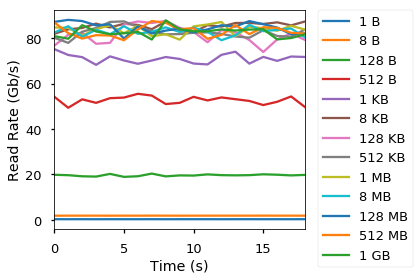

In [85]:
disk.plot(y=['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB','1 GB'])
plt.ylabel("Read Rate (Gb/s)")
plt.xlabel("Time (s)")
#plt.ylim(-50,200)
plt.xlim(0,18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.suptitle('Disk Bandwidth', fontsize=14, fontweight='bold')
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/disk_sto_time.eps',format='eps',dpi=1000)
plt.show()

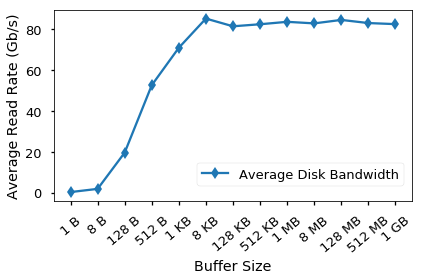

In [86]:
means.plot(y=['Average Disk Bandwidth'],xticks=means.index,marker='d').set_xticklabels(means.Range)
#ax.set_xticklabels(means.action)
plt.ylabel("Average Read Rate (Gb/s)")
plt.xlabel("Buffer Size")
#plt.ylim(0,100)
plt.legend(bbox_to_anchor=(0.4, 0.2), loc=2, borderaxespad=0.)
#plt.suptitle('Average Disk Bandwidth (Buffer Size)', fontsize=14, fontweight='bold')
plt.xticks(rotation=40)
plt.tight_layout() # otherwise it's cut
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/disk_sto_buf.eps',format='eps',dpi=1000)
plt.show()

In [21]:
# CPU usage 4th nobuf

ib=pd.read_csv("../read/cpu_1B.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
ib=ib[['us','sy','si']]
ib['tot']=ib.sum(axis=1)
ib['totc']=ib['tot'].iloc[0:6]
ib['tots']=ib['tot'].iloc[6:12]

vb=pd.read_csv("../read/cpu_8B.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
vb=vb[['us','sy','si']]
vb['tot']=vb.sum(axis=1)
vb['totc']=vb['tot'].iloc[0:6]
vb['tots']=vb['tot'].iloc[6:12]

cb=pd.read_csv("../read/cpu_128B.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
cb=cb[['us','sy','si']]
cb['tot']=cb.sum(axis=1)
cb['totc']=cb['tot'].iloc[0:6]
cb['tots']=cb['tot'].iloc[6:12]

db=pd.read_csv("../read/cpu_512B.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
db=db[['us','sy','si']]
db['tot']=db.sum(axis=1)
db['totc']=db['tot'].iloc[0:6]
db['tots']=db['tot'].iloc[6:12]

ikb=pd.read_csv("../read/cpu_1KB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
ikb=ikb[['us','sy','si']]
ikb['tot']=ikb.sum(axis=1)
ikb['totc']=ikb['tot'].iloc[0:6]
ikb['tots']=ikb['tot'].iloc[6:12]

vkb=pd.read_csv("../read/cpu_8KB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
vkb=vkb[['us','sy','si']]
vkb['tot']=vkb.sum(axis=1)
vkb['totc']=vkb['tot'].iloc[0:6]
vkb['tots']=vkb['tot'].iloc[6:12]

ckb=pd.read_csv("../read/cpu_128KB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
ckb=ckb[['us','sy','si']]
ckb['tot']=ckb.sum(axis=1)
ckb['totc']=ckb['tot'].iloc[0:6]
ckb['tots']=ckb['tot'].iloc[6:12]

dkb=pd.read_csv("../read/cpu_512KB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
dkb=dkb[['us','sy','si']]
dkb['tot']=dkb.sum(axis=1)
dkb['totc']=dkb['tot'].iloc[0:6]
dkb['tots']=dkb['tot'].iloc[6:12]

imb=pd.read_csv("../read/cpu_1MB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
imb=imb[['us','sy','si']]
imb['tot']=imb.sum(axis=1)
imb['totc']=imb['tot'].iloc[0:6]
imb['tots']=imb['tot'].iloc[6:12]

vmb=pd.read_csv("../read/cpu_8MB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
vmb=vmb[['us','sy','si']]
vmb['tot']=vmb.sum(axis=1)
vmb['totc']=vmb['tot'].iloc[0:6]
vmb['tots']=vmb['tot'].iloc[6:12]

cmb=pd.read_csv("../read/cpu_128MB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
cmb=cmb[['us','sy','si']]
cmb['tot']=cmb.sum(axis=1)
cmb['totc']=cmb['tot'].iloc[0:6]
cmb['tots']=cmb['tot'].iloc[6:12]

dmb=pd.read_csv("../read/cpu_512MB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
dmb=dmb[['us','sy','si']]
dmb['tot']=dmb.sum(axis=1)
dmb['totc']=dmb['tot'].iloc[0:6]
dmb['tots']=dmb['tot'].iloc[6:12]

igb=pd.read_csv("../read/cpu_1GB.txt",sep=',',names=['us','sy','null','null','null','null','si','null'])
igb=igb[['us','sy','si']]
igb['tot']=igb.sum(axis=1)
igb['totc']=igb['tot'].iloc[0:6]
igb['tots']=igb['tot'].iloc[6:12]



means=pd.DataFrame({"server":[ib['tots'].mean(),vb['tots'].mean(),cb['tots'].mean(),db['tots'].mean(),ikb['tots'].mean(),vkb['tots'].mean(),ckb['tots'].mean(),dkb['tots'].mean(),imb['tots'].mean(),vmb['tots'].mean(),cmb['tots'].mean(),dmb['tots'].mean(),igb['tots'].mean()],
                    "client":[ib['totc'].mean(),vb['totc'].mean(),cb['totc'].mean(),db['totc'].mean(),ikb['totc'].mean(),vkb['totc'].mean(),ckb['totc'].mean(),dkb['totc'].mean(),imb['totc'].mean(),vmb['totc'].mean(),cmb['totc'].mean(),dmb['totc'].mean(),igb['totc'].mean()],
                   "Range":['1 B','8 B','128 B','512 B','1 KB','8 KB','128 KB','512 KB','1 MB','8 MB','128 MB','512 MB','1 GB']})
#means.rename(index={0:'default',1:'noirqb',2:'change affinities',3:'add port-queue rules',4:'bind process'},inplace=True)
means

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


server      client   Range
0   80.016667   79.816667     1 B
1   79.333333   79.166667     8 B
2   99.983333  100.016667   128 B
3   99.950000  100.016667   512 B
4   89.033333   89.816667    1 KB
5   45.733333   43.633333    8 KB
6   57.066667   65.783333  128 KB
7   49.933333   68.633333  512 KB
8   61.800000   67.016667    1 MB
9   52.583333   54.900000    8 MB
10  64.566667   67.250000  128 MB
11  69.750000   74.700000  512 MB
12  62.900000   68.100000    1 GB

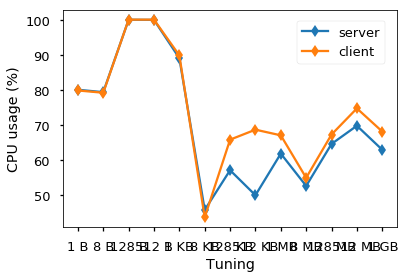

In [26]:
means.plot(y=['server','client'],xticks=means.index,marker='d').set_xticklabels(means.Range)
#ax.set_xticklabels(means.action)
plt.ylabel("CPU usage (%)")
plt.xlabel("Tuning")
#plt.ylim(0,14)
plt.legend(bbox_to_anchor=(0.7, 0.95), loc=2, borderaxespad=0.)
#plt.tight_layout() # otherwise it's cut
#plt.suptitle('CPU usage, 4 streams', fontsize=14, fontweight='bold')
plt.savefig('/Users/massimilianogalli/Documents/openlab2018/LaTeX_template_openlab_approved/figures/cpu_action.eps',format='eps',dpi=1000)

plt.show()